#### 下面做簡單的 CLT 實驗

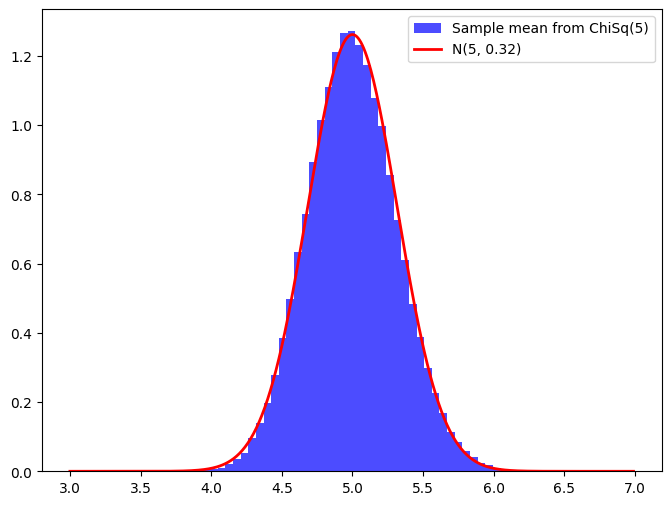

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2, norm

# generate n samples from a chisq distribution
n = 100
k = 5
N = 100000
# x_bar = np.zeros(N)                 # 給予一個向量，裡面會有 N 個 0，用來存放每次的平均值
# for i in range(N):
#     x = chi2.rvs(df = k, size = n)  # 生成 n 個來自自由度為 k 的卡方分配的樣本
#     x_bar[i] = np.mean(x)           # 計算這 n 個樣本的平均值

# 上面如果用迴圈會佔 RAM 的內存，當跑大筆資料時會很慢，可以改用下面的寫法
# do the same thing without looping
x = chi2.rvs(df = k, size = (N, n))  # 生成 N 組 n 個來自自由度為 k 的卡方分配的樣本
x_bar = np.mean(x, axis = 1)         # 計算這 n 個樣本的平均值，axis = 1 指定每行做平均
# 結論：比上面快很多，因為不用一個一個去跑迴圈，當迴圈跑不動時，要改用矩陣方式寫

norm_x = np.arange(3, 7, 0.01)
# 按照 CLT，當 n 越大時，樣本平均值的分佈會趨近於常態分佈，會是 N(mu, sigma^2/n)，其中
# mu = k(卡方期望值)，sigma^2 = 2k
mu = k
s = np.sqrt(2 * k / n)
norm_y = norm.pdf(norm_x, loc = mu, scale = s)

plt.figure(figsize = (8, 6))
plt.hist(x_bar, bins = 50, density = True, color = 'blue', alpha = 0.7, label = 'Sample mean from ChiSq(5)')
plt.plot(norm_x, norm_y, color = 'red', lw = 2, label = 'N({}, {})'.format(mu, round(s, 2)))
plt.legend()
plt.show()

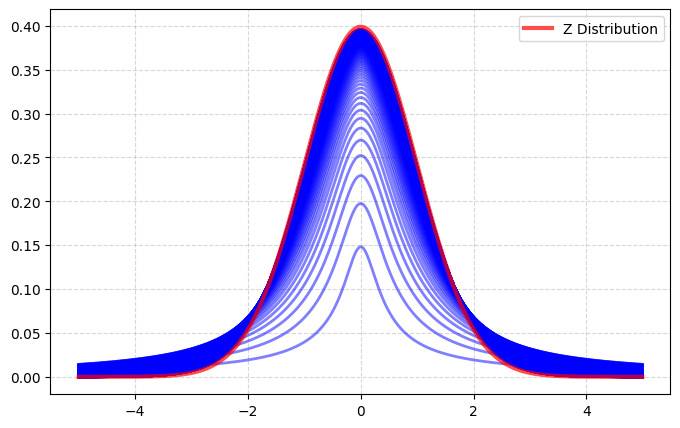

In [70]:
# draw a pdf of T distribution
from scipy.stats import t

k = np.arange(0.1, 30.1, 0.1)
x = np.arange(-5, 5, 0.01)
# y = t.pdf(x.reshape(-1, 1), df = k)
y = t.pdf(x[:, np.newaxis], df = k)

plt.figure(figsize = (8, 5))
plt.grid(True, linestyle = '--', alpha = 0.5)
plt.plot(x, y, color = 'blue', lw = 2, alpha = 0.5)

# draw a pdf of standard normal distribution
x = np.arange(-5, 5, 0.01)
y = norm.pdf(x)
plt.plot(x, y, color = 'red', lw = 3, alpha = 0.7, label = 'Z Distribution')
plt.legend()

# animation
# for i in range(len(k)):
#     y1 = t.pdf(x, df = k[i])
#     y2 = norm.pdf(x)
#     plt.plot(x, y1, color = 'blue', lw = 2, alpha = 0.5)
#     plt.title('T Distribution (df = {})'.format(round(k[i], 2)))
    # plt.pause(0.5)

# plt.plot(x, y2, color = 'red', lw = 3, alpha = 0.7, label = 'Z Distribution')
# plt.legend()

plt.show()

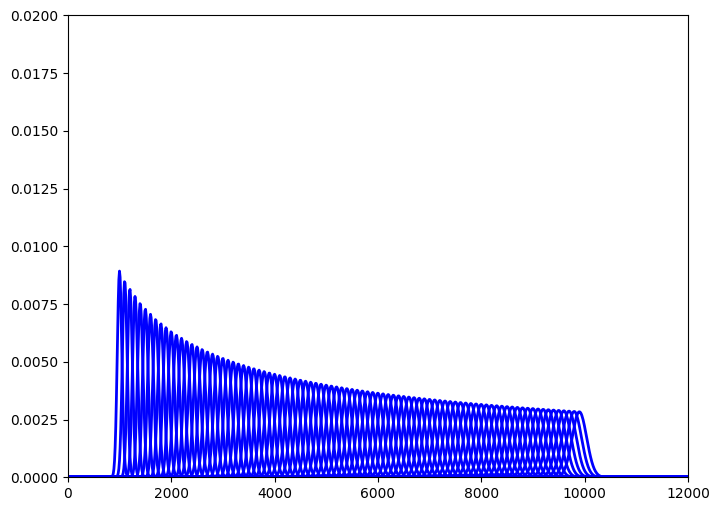

In [46]:
xlim = [0, 12000]
x = np.linspace(xlim[0], xlim[1], 1000)
df = np.arange(1000, 10000, 100)
y = chi2.pdf(x.reshape(-1, 1), df = df)

plt.figure(figsize = (8, 6))
plt.plot(x, y, color = 'blue', lw = 2)
plt.xlim([xlim[0], xlim[1]])
plt.ylim([0, 0.02])
plt.show()